In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, AveragePooling2D, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from keras import models, layers
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
import time

In [2]:
# import data
# all_data = pd.read_csv('w207_final_project_hold/data/icml_face_data.csv')
all_data = pd.read_csv('../input/facial-expression-recognition-challenge/icml_face_data.csv/icml_face_data.csv')
# all_data = all_data[0:700] # just for dev... remove for actual training
print(all_data.shape)

accuracy = {}
params = {}

(35887, 3)


In [3]:
all_data.rename({' Usage': 'Usage', ' pixels': 'pixels'}, axis=1, inplace=True)

In [4]:
def pixels_to_arr(pixels):
    array = np.array(pixels.split(),'float64')
    return array

all_data['pixels_arr'] = all_data['pixels'].apply(pixels_to_arr)

In [5]:
def image_reshape(data):
    image = np.reshape(data['pixels_arr'].to_list(),(data.shape[0],48,48,1))
    return image

X = image_reshape(all_data)
y = all_data['emotion']

In [6]:
X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(X, y, test_size=0.2, random_state=12345)
X_train_im, X_val_im, y_train_im, y_val_im = train_test_split(X_train_im, y_train_im, test_size=0.25, random_state=1)

print("Converted Images")
print("Training data shape: ", X_train_im.shape)
print("Test data shape", X_test_im.shape)
print("Validation data shape", X_val_im.shape)

Converted Images
Training data shape:  (21531, 48, 48, 1)
Test data shape (7178, 48, 48, 1)
Validation data shape (7178, 48, 48, 1)


In [7]:
train_labels = to_categorical(y_train_im)
val_labels = to_categorical(y_test_im)
test_labels = to_categorical(y_val_im)

In [8]:
classes = dict(zip(range(0, 7), (((all_data[all_data['Usage']=='Training']['emotion'].value_counts()).sort_index())/len(all_data[all_data['Usage']=='Training']['emotion'])).tolist()))

In [9]:
def create_model(): 
    model_cnn = models.Sequential()
    model_cnn.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    model_cnn.add(layers.MaxPool2D((2, 2)))
    model_cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model_cnn.add(layers.MaxPool2D((2, 2)))
    model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model_cnn.add(layers.MaxPool2D((2, 2)))
    model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model_cnn.add(layers.Flatten())
    model_cnn.add(layers.Dense(64, activation='relu'))
    model_cnn.add(layers.Dense(7, activation='softmax'))
    model_cnn.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
    return model_cnn

In [10]:
# define parameters and values for grid search 
param_grid = {
    'batch_size': [16, 32, 64, 128],
    'epochs': [5, 10, 25, 50]
}

model_test = KerasClassifier(build_fn=create_model, verbose=1)
grid = GridSearchCV(estimator=model_test, param_grid=param_grid, cv=3)#, scoring="accuracy")
grid_result = grid.fit(X, to_categorical(y))  


2021-12-04 22:05:52.539631: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-04 22:05:52.633155: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-04 22:05:52.633853: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-04 22:05:52.635351: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/5


2021-12-04 22:05:56.441162: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1496/1496 [==============================] - 14s 5ms/step - loss: 1.7861 - accuracy: 0.3175
Epoch 2/5
1496/1496 [==============================] - 7s 5ms/step - loss: 1.5450 - accuracy: 0.4030
Epoch 3/5
1496/1496 [==============================] - 7s 5ms/step - loss: 1.4723 - accuracy: 0.4325
Epoch 4/5
1496/1496 [==============================] - 8s 5ms/step - loss: 1.4156 - accuracy: 0.4529
Epoch 5/5
748/748 [==============================] - 3s 3ms/step - loss: 1.4128 - accuracy: 0.4579
Epoch 1/5
1496/1496 [==============================] - 7s 5ms/step - loss: 1.8142 - accuracy: 0.2855
Epoch 2/5
1496/1496 [==============================] - 7s 5ms/step - loss: 1.5840 - accuracy: 0.3882
Epoch 3/5
1496/1496 [==============================] - 7s 5ms/step - loss: 1.4835 - accuracy: 0.4306
Epoch 4/5
1496/1496 [==============================] - 7s 5ms/step - loss: 1.4123 - accuracy: 0.4600
Epoch 5/5
748/748 [==============================] - 2s 3ms/step - loss: 1.3836 - accuracy: 0.4760
Epo

In [11]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.505392 using {'batch_size': 64, 'epochs': 25}


In [12]:
best_params = grid_result.best_params_

final_model = create_model()

history = final_model.fit(X_train_im, train_labels,
                    validation_data=(X_val_im, val_labels),
                    class_weight = classes,
                    epochs = best_params['epochs'],
                    batch_size = best_params['batch_size'])

Epoch 1/25
337/337 [==============================] - 4s 12ms/step - loss: 0.3078 - accuracy: 0.2767 - val_loss: 2.0054 - val_accuracy: 0.1793
Epoch 2/25
337/337 [==============================] - 3s 10ms/step - loss: 0.2541 - accuracy: 0.3632 - val_loss: 2.1944 - val_accuracy: 0.2010
Epoch 3/25
337/337 [==============================] - 3s 10ms/step - loss: 0.2410 - accuracy: 0.3971 - val_loss: 2.2175 - val_accuracy: 0.1858
Epoch 4/25
337/337 [==============================] - 3s 10ms/step - loss: 0.2282 - accuracy: 0.4273 - val_loss: 2.4484 - val_accuracy: 0.1868
Epoch 5/25
337/337 [==============================] - 3s 10ms/step - loss: 0.2181 - accuracy: 0.4593 - val_loss: 2.5296 - val_accuracy: 0.1925
Epoch 6/25
337/337 [==============================] - 3s 10ms/step - loss: 0.2096 - accuracy: 0.4815 - val_loss: 2.5825 - val_accuracy: 0.1899
Epoch 7/25
337/337 [==============================] - 3s 10ms/step - loss: 0.2030 - accuracy: 0.4945 - val_loss: 2.6196 - val_accuracy: 0.1888

In [13]:
test_prob = final_model.predict(X_test_im)
y_pred = np.argmax(test_prob, axis=1)
test_accuracy = np.mean(y_pred == y_test_im)

print(test_accuracy)

0.4916411256617442


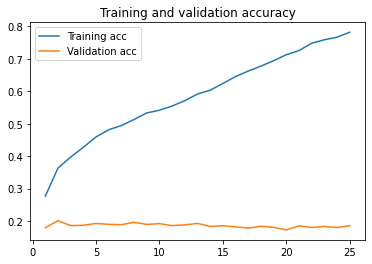

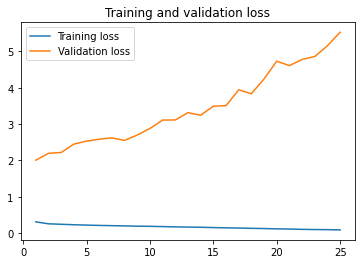

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()